MULTIPLE LINEAR REGRESSION

Dataset:
The data below shows the amount spent by 3 departments and
profit gained for a company.

In [1]:
#Multiple Linear Regression
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
ds=pd.read_csv('MLR_numeric.csv')
ds.head()

,S&P department (spend),Admin department(spend),Operation department(spend),Profit
0,101184,70674,97009,259480
1,70132,52030,63587,137019
2,149539,98535,199994,495552
3,75821,53649,66500,165057
4,97730,68667,91754,247841


In [2]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   S&P department (spend)       50 non-null     int64
 1   Admin department(spend)      50 non-null     int64
 2   Operation department(spend)  50 non-null     int64
 3   Profit                       50 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [3]:
#x=ds.iloc[:,[0,1,2]].values 
x=ds.iloc[:,:-1].values 
y=ds.iloc [:,3].values
#print(x)


In [4]:
x = ds[["S&P department (spend)","Admin department(spend)","Operation department(spend)"]]
y = ds["Profit"]
print(x)

    S&P department (spend)  Admin department(spend)  \
0                   101184                    70674   
1                    70132                    52030   
2                   149539                    98535   
3                    75821                    53649   
4                    97730                    68667   
5                    84544                    60923   
6                   117490                    85379   
7                   119913                    86499   
8                   145244                    95108   
9                   147217                    95598   
10                   81746                    56815   
11                  107967                    74058   
12                   74692                    52493   
13                   72228                    52210   
14                   96292                    68521   
15                  124506                    86995   
16                  113543                    82796   
17        

In [5]:
#calculate the correlation coefficient for the dataset
corr = ds.corr()
print(corr)

                             S&P department (spend)  Admin department(spend)  \
S&P department (spend)                     1.000000                 0.984560   
Admin department(spend)                    0.984560                 1.000000   
Operation department(spend)                0.976437                 0.980723   
Profit                                     0.982576                 0.993823   

                             Operation department(spend)    Profit  
S&P department (spend)                          0.976437  0.982576  
Admin department(spend)                         0.980723  0.993823  
Operation department(spend)                     1.000000  0.975566  
Profit                                          0.975566  1.000000  


In [6]:
#splitting the dataset into training and test sets
#use 20% for testing data
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split (x, y, test_size = 0.2, random_state = 0)

In [7]:
#Fitting multiple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Coefficients,beta:', regressor.coef_)
print('Constant,alpha:', regressor.predict([[0,0,0]]))

Coefficients,beta: [ 0.74568222  6.6837466  -0.17261534]
Constant,alpha: [-245992.40257837]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
#Predicting the results for test set-Step 3
y_pred=regressor.predict(x_test)
print(y_pred)
print(y_test)

[474262.32345618 311167.2377158  182212.30728899 254661.21837792
 489577.11092429 388254.76244367 216897.80322374 227697.88060702
 456234.34442673 269997.80127102]
28    466013
11    305250
10    188824
41    241206
2     495552
27    397289
38    222793
31    229567
22    438294
4     247841
Name: Profit, dtype: int64


In [12]:
#calculate the correlation coefficient
corr = np.corrcoef(y_pred, y_test)
print(corr)

[[1.         0.99521366]
 [0.99521366 1.        ]]


In [14]:
#Prediction
a=[[90020,55200,94230]]
y_predict=regressor.predict(a)
print(y_predict)

[173811.18025181]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
#CALCULATE THE MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print(MSE) #don't use for classification

129616592.25129525


In [16]:
RMSE=np.sqrt(MSE)
RMSE

11384.928293638712

In [17]:
#EXAMPLE, TAKE DATA FROM OUTPUT
RMSE=np.sqrt(MSE)
RMSE/474262.32345618*100

2.400555079026984

In [18]:
RMSE/np.mean(y_test)*100
RMSE

11384.928293638712

**MLR -  MIXED NUMERIC AND CATEGORICAL DATA**

Dataset (MLR_mix.csv):
The data below shows the amount spent by 3 departments and profit gained
by the companies from 2 different states

In [20]:
#Multiple Linear Regression
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
ds=pd.read_csv('MLR_mix.csv')
ds.head()

,S&P department (spend),Admin department(spend),Operation department(spend),state,Profit
0,101184,70674,97009,A,259480
1,70132,52030,63587,B,137019
2,149539,98535,199994,A,495552
3,75821,53649,66500,B,165057
4,97730,68667,91754,B,247841


In [21]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   S&P department (spend)       50 non-null     int64 
 1   Admin department(spend)      50 non-null     int64 
 2   Operation department(spend)  50 non-null     int64 
 3   state                        50 non-null     object
 4   Profit                       50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [22]:
#x=ds.iloc[:,[0,1,2,3]].values
#x=ds.iloc[:,:4].values
x=ds.iloc[:,:-1].values
y=ds.iloc[:,4].values
#print(x)
#print(y)

In [23]:
#calculate the correlation coefficient for the dataset
corr = ds.corr()
print(corr)

                             S&P department (spend)  Admin department(spend)  \
S&P department (spend)                     1.000000                 0.984560   
Admin department(spend)                    0.984560                 1.000000   
Operation department(spend)                0.976437                 0.980723   
Profit                                     0.982576                 0.993823   

                             Operation department(spend)    Profit  
S&P department (spend)                          0.976437  0.982576  
Admin department(spend)                         0.980723  0.993823  
Operation department(spend)                     1.000000  0.975566  
Profit                                          0.975566  1.000000  


In [24]:
#STEP 2
#Handling or Encode categorical variables
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x = LabelEncoder()
x[:, 3] = labelencoder_x.fit_transform(x[:,3])

ct = ColumnTransformer ([("State", OneHotEncoder(), [3])], remainder='passthrough')
x = ct.fit_transform (x)
print(x)

[[1.0 0.0 101184 70674 97009]
 [0.0 1.0 70132 52030 63587]
 [1.0 0.0 149539 98535 199994]
 [0.0 1.0 75821 53649 66500]
 [0.0 1.0 97730 68667 91754]
 [0.0 1.0 84544 60923 81618]
 [1.0 0.0 117490 85379 146277]
 [0.0 1.0 119913 86499 150579]
 [0.0 1.0 145244 95108 189066]
 [1.0 0.0 147217 95598 190309]
 [0.0 1.0 81746 56815 72351]
 [1.0 0.0 107967 74058 106215]
 [1.0 0.0 74692 52493 64267]
 [1.0 0.0 72228 52210 63719]
 [0.0 1.0 96292 68521 90007]
 [1.0 0.0 124506 86995 153382]
 [0.0 1.0 113543 82796 122345]
 [1.0 0.0 142585 94589 184603]
 [1.0 0.0 118057 86227 146948]
 [1.0 0.0 86260 63082 85320]
 [1.0 0.0 63601 51026 59932]
 [1.0 0.0 113200 76388 115984]
 [0.0 1.0 141331 93725 171453]
 [1.0 0.0 79667 54864 69102]
 [0.0 1.0 112208 75407 115316]
 [1.0 0.0 82622 59754 72987]
 [0.0 1.0 127721 88888 153477]
 [0.0 1.0 117901 85532 146822]
 [0.0 1.0 147364 96275 191812]
 [1.0 0.0 110661 75404 114864]
 [0.0 1.0 107360 73604 100773]
 [0.0 1.0 87194 63403 87468]
 [1.0 0.0 75381 52575 66116]
 [1.0 

In [25]:
#Avoid dummy variable,remove the unnecessary column
x=x[:,1:] #keep B
#x=x[:,[0,2,3,4]] #keep A

In [26]:
#splitting the dataset into training and test sets
#use 20% for testing data
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split (x, y, test_size = 0.2, random_state = 0)

In [27]:
#import scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_X = StandardScaler()
#sc_X = MinMaxScaler() #normalization
x_train = sc_X.fit_transform(x_train) #not original train data,automatically calculate the miu n std value calculated from x train

In [28]:
#Fitting simple linear regression to training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('Coefficients,beta:', regressor.coef_)
print('Constant,alpha:', regressor.predict([[0,0,0,0]]))

Coefficients,beta: [ -3778.94266828  15057.72856866 102355.90072011  -7688.65481663]
Constant,alpha: [300828.1]


In [29]:
x_test = sc_X.transform(x_test)

In [30]:
#Predicting the results for test set-Step 3
y_pred=regressor.predict(x_test)
print(y_pred)
print(y_test)

[469131.79514153 314305.95098855 177031.76224272 251333.22466428
 492265.59457446 384791.47672058 212333.02403266 223303.09210661
 451563.42840049 265608.51763769]
[466013 305250 188824 241206 495552 397289 222793 229567 438294 247841]


In [31]:
#calculate the correlation coefficient
#nak cek linear relationship
corr=np.corrcoef(y_pred, y_test)
print(corr)

[[1.         0.99542528]
 [0.99542528 1.        ]]


In [32]:
#CALCULATE THE MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test, y_pred)
print(MSE) #don't use for classification

114075328.33230369


In [33]:
RMSE=np.sqrt(MSE)
RMSE/np.mean(y_test)*100
RMSE

10680.605241853276

In [38]:
#Prediction
x =[[1.0,90020.0,55200.0,94230.0]]# B happen
y_predict=regressor.predict(x)
print(y_predict)

[6.28133755e+09]


In [39]:
#Wrong Prediction
x_input = sc_X.transform([[0,90020,55200,94230]])#state A happen
y_pred=regressor.predict(x_input)
print(y_pred)

[174400.58019591]


**POLYNOMIAL REGRESSION**

In [40]:
#Polynomial Regression - step 1
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import dataset
ds=pd .read_csv ('Volume_price.csv')
ds.head()

,Volume,Price
0,10,393.10
1,11,471.91
2,14,751.66
3,16,974.26
4,17,1096.39


In [41]:
#step 2
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  23 non-null     int64  
 1   Price   23 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [42]:
#step 3
#x=ds.iloc[:,:-1].values
x=ds.iloc[:,[0]].values
y=ds.iloc [:,1].values

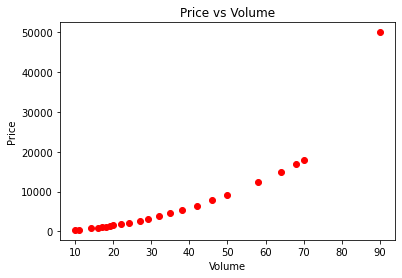

In [43]:
# visualizing the result
plt.scatter(x,y,color='red')
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()#

In [44]:
#step 4
#Fitting polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg2= PolynomialFeatures(degree=2)
x_poly2=poly_reg2.fit_transform(x)

regressor2=LinearRegression()
regressor2.fit(x_poly2,y)

LinearRegression()

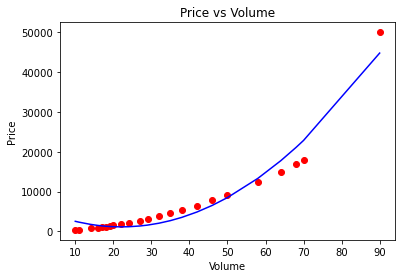

In [45]:
#visualizing the result
plt.scatter(x,y,color='red')
plt.plot(x, regressor2.predict(x_poly2), color='blue')
plt.title('Price vs Volume')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [46]:
#Fitting polynomial regression to the dataset
#use degree 5 for best fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg5= PolynomialFeatures(degree=5)
x_poly5=poly_reg5.fit_transform(x)
regressor5=LinearRegression()
regressor5.fit(x_poly5,y)

LinearRegression()

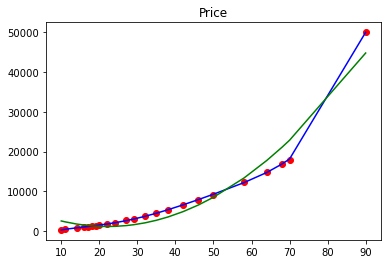

In [47]:
# Polynomial Linear Regression – Step 3:
# visualizing the result
plt.scatter(x,y,color='red')
plt.plot(x, regressor5.predict(x_poly5), color='blue')
plt.plot(x, regressor2.predict(x_poly2), color='green')
plt.title('Price')
plt.show()

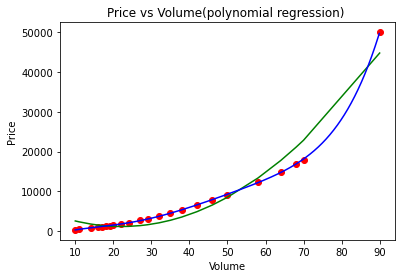

In [48]:
#visualizing the regression result(for higher resolution and smoother curve) 
x_grid = np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))

plt.scatter(x,y,color='red')
plt.plot(x, regressor2.predict(x_poly2), color='green')
plt.plot(x_grid, regressor5.predict(poly_reg5.fit_transform(x_grid)), color='blue')
plt.title('Price vs Volume(polynomial regression) ')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()

In [49]:
#Predict the price when the volume is 35. (degree 5)
y_predict=regressor5.predict(poly_reg5.fit_transform([[35]]))
print(y_predict)
#actual answer is 4529.35

[4502.56250036]


In [50]:
#Predict the price when the volume is 35. (degree 2)
y_predict=regressor2.predict(poly_reg2.fit_transform([[35]]))
print(y_predict)

[2724.87262355]
